In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pycountry_convert as pcc
import random
import geopandas as gpd
import plotly.express as px

# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [7]:
airports = pd.read_csv("csv_airports_v1.csv")
routes = pd.read_csv("csv_routes_v1.csv")

## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [3]:
display(airports.info())
display(routes.info())
airports.replace('\\N', np.nan, inplace = True)
display(airports.info())
display(routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67662 non-null  object
 1   Airline ID              67662 non-null  object
 2   Source airport          67662 non-null  object
 3   Source airport ID       67662 non-null  object
 4   Destination airport     67662 non-null  object
 5   Destination airport ID  67662 non-null  object
 6   Equipment               67644 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  7696 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7344 non-null   object 
 10  DST                   7344 non-null   object 
 11  Tz database timezone  6676 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67662 non-null  object
 1   Airline ID              67662 non-null  object
 2   Source airport          67662 non-null  object
 3   Source airport ID       67662 non-null  object
 4   Destination airport     67662 non-null  object
 5   Destination airport ID  67662 non-null  object
 6   Equipment               67644 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


None

## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [4]:
iata_arports = airports[airports["IATA"].notna()].copy()
def country_to_continent(country_name):
    try:
        country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
        country_continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pcc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None
iata_arports["Continents"] = iata_arports["Country"].map(country_to_continent)
iata_arports[iata_arports["Continents"].isna()]["Country"].unique()
country_dict = {
    "Cote d'Ivoire":"Africa",
    "Congo (Brazzaville)":"Africa",
    "Congo (Kinshasa)":"Africa",
    "Saint Helena":"Africa",
    "Reunion": "Africa",
    "Midway Islands":"North America",
    "Antarctica":"Antarctica",
    "Virgin Islands":"North America",
    "Netherlands Antilles":"South America",
    "Burma":"Asia",
    "East Timor":"Asia",
    "Johnston Atoll":"North America",
    "Western Sahara":"Africa",
    "Wake Island":"North America"}
iata_arports["Continents"] = iata_arports["Continents"].fillna(iata_arports["Country"].map(country_dict))
display(iata_arports.head())

C:\Users\User\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continents
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,Oceania
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,Oceania


## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

C:\Users\User\AppData\Local\Temp\ipykernel_2976\2340993757.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\User\AppData\Local\Temp\ipykernel_2976\2340993757.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\User\AppData\Local\Temp\ipykernel_2976\2340993757.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  

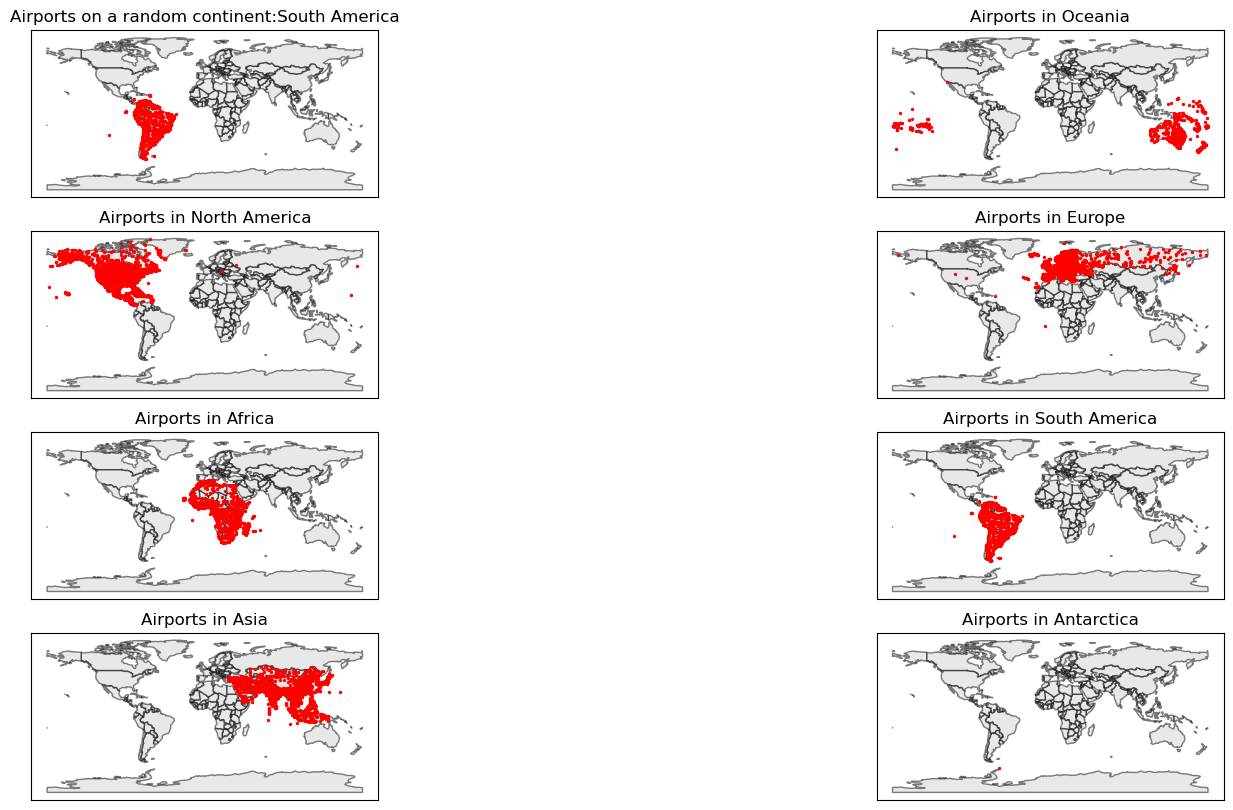

In [5]:
np.random.seed(42)
all_continents = iata_arports[iata_arports["Continents"].notna()]["Continents"].unique()
random_continent = random.choice(all_continents)
all_continents = np.insert(all_continents,0,random_continent)
fig, axes = plt.subplots(4, 2, figsize=(20, 10))
for i,continent in enumerate(all_continents):
    ax = axes.flatten()[i]
    airport_coordinates_df = iata_arports[iata_arports["Continents"]== continent][["Latitude","Longitude"]]
    airport_coordinates_gdf = gpd.GeoDataFrame(airport_coordinates_df, geometry=gpd.points_from_xy(airport_coordinates_df['Longitude'],airport_coordinates_df['Latitude']))
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    world.plot(ax=ax,color="lightgray",edgecolor="black",alpha=0.5)
    airport_coordinates_gdf.plot(ax=ax, color='red', markersize=2, marker='o', label='Airports')
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 0:
        ax.set_title(f"Airports on a random continent:{random_continent}")
    else:
        ax.set_title(f"Airports in {continent}")
plt.show()
#Да, в данных есть ошибки, т.к. в некоторых графиках точки с координатами аэропортов оказываются не на своем континенте

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

,Takeoffs,Landings,Takeoffs/Landings
Country,,,
Argentina,255,256,511
Bolivia,100,103,203
Brazil,1393,1391,2784
Chile,153,152,305
Colombia,357,357,714
Ecuador,97,99,196
Falkland Islands,1,1,2
French Guiana,7,7,14
Guyana,9,9,18


C:\Users\User\AppData\Local\Temp\ipykernel_2976\1460743043.py:22: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



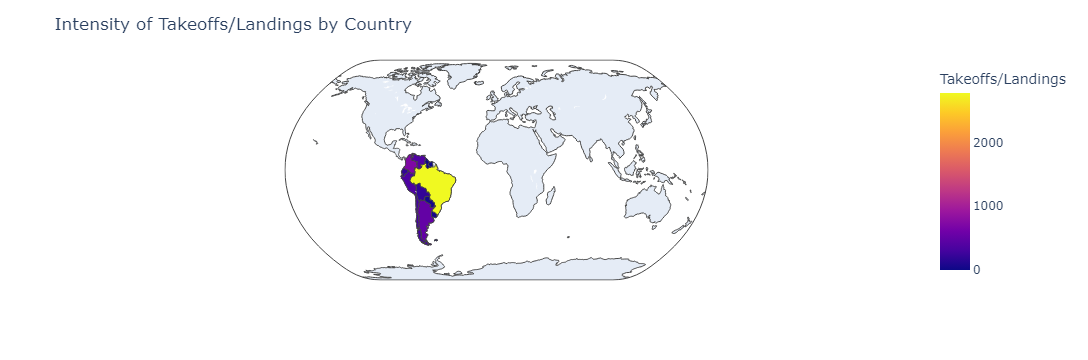

In [9]:
id_random_continent = iata_arports[iata_arports["Continents"] == random_continent]
id_random_continent_df = pd.DataFrame(id_random_continent)
routes_source_sorted = routes.sort_values("Source airport ID")
routes_source_sorted.replace('\\N', np.nan, inplace = True)
routes_source_sorted = routes_source_sorted[routes_source_sorted["Source airport ID"].notna()]
routes_source_sorted["Source airport ID"] = routes_source_sorted["Source airport ID"].astype("int64")
source_table = id_random_continent_df.merge(routes_source_sorted,how='inner',left_on = "Airport ID",right_on = "Source airport ID")
source_table_1 = source_table.groupby("Country")["Source airport ID"].count()
source_table_2 = pd.DataFrame(source_table_1)
routes_destination_sorted = routes.sort_values("Destination airport ID")
routes_destination_sorted.replace('\\N', np.nan, inplace = True)
routes_destination_sorted = routes_destination_sorted[routes_destination_sorted["Destination airport ID"].notna()]
routes_destination_sorted["Destination airport ID"] = routes_destination_sorted["Destination airport ID"].astype("int64")
destination_table = id_random_continent_df.merge(routes_destination_sorted,how='inner',left_on = "Airport ID",right_on = "Destination airport ID")
destination_table_1 = destination_table.groupby("Country")["Destination airport ID"].count()
destination_table_2 = pd.DataFrame(destination_table_1)
common_table = source_table_2.merge(destination_table_2, how = "outer",on = "Country")
common_table = common_table.rename(columns = {"Source airport ID": "Takeoffs", "Destination airport ID" : "Landings"})
common_table = common_table.rename(index={'United States': 'United States of America'})
common_table["Takeoffs/Landings"] = common_table["Takeoffs"] + common_table["Landings"]
display(common_table)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_merged = world[world["continent"]== random_continent].merge(common_table, how='left', left_on='name', right_on='Country')
world_merged['Takeoffs/Landings'] = world_merged["Takeoffs"] + world_merged["Landings"]
world_merged = world_merged.fillna(0)
fig = px.choropleth(world_merged,locations='iso_a3', color='Takeoffs/Landings',hover_name='name', projection='natural earth')
fig.update_layout(title='Intensity of Takeoffs/Landings by Country',coloraxis_colorbar_title='Takeoffs/Landings',geo=dict(showcoastlines=True,))
fig.show()

## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

Country  \
Continents    Name of airport                                                    
Africa        OR Tambo International Airport                      South Africa   
              Cairo International Airport                                Egypt   
              Jomo Kenyatta International Airport                        Kenya   
              Mohammed V International Airport                         Morocco   
              Addis Ababa Bole International Airport                  Ethiopia   
...                                                                        ...   
South America Simón Bolívar International Airport                    Venezuela   
              Comodoro Arturo Merino Benítez International Ai...         Chile   
              Ministro Pistarini International Airport               Argentina   
              Jorge Newbery Airpark                                  Argentina   
              Deputado Luiz Eduardo Magalhães International A...        Brazil   

                                                                          City  \
Continents    Name of airport                                                    
Africa        OR Tambo International Airport                      Johannesburg   
              Cairo International Airport                                Cairo   
              Jomo Kenyatta International Airport                      Nairobi   
              Mohammed V International Airport                      Casablanca   
              Addis Ababa Bole International Airport               Addis Ababa   
...                                                                        ...   
South America Simón Bolívar International Airport                      Caracas   
              Comodoro Arturo Merino Benítez International Ai...      Santiago   
              Ministro Pistarini International Airport            Buenos Aires   
              Jorge Newbery Airpark                               Buenos Aires   
              Deputado Luiz Eduardo Magalhães International A...      Salvador   

                                                                 IATA  \
Continents    Name of airport                                           
Africa        OR Tambo International Airport                      JNB   
              Cairo International Airport                         CAI   
              Jomo Kenyatta International Airport                 NBO   
              Mohammed V International Airport                    CMN   
              Addis Ababa Bole International Airport              ADD   
...                                                               ...   
South America Simón Bolívar International Airport                 CCS   
              Comodoro Arturo Merino Benítez International Ai...  SCL   
              Ministro Pistarini International Airport            EZE   
              Jorge Newbery Airpark                               AEP   
              Deputado Luiz Eduardo Magalhães International A...  SSA   

                                                                  Takeoffs  \
Continents    Name of airport                                                
Africa        OR Tambo International Airport                           159   
              Cairo International Airport                              151   
              Jomo Kenyatta International Airport                      130   
              Mohammed V International Airport                         125   
              Addis Ababa Bole International Airport                   105   
...                                                                    ...   
South America Simón Bolívar International Airport                       94   
              Comodoro Arturo Merino Benítez International Ai...        79   
              Ministro Pistarini International Airport                  75   
              Jorge Newbery Airpark                                     65   
              Deputado Luiz Eduardo Magalhães Inter

C:\Users\User\AppData\Local\Temp\ipykernel_2976\3943804638.py:29: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\User\AppData\Local\Temp\ipykernel_2976\3943804638.py:29: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\User\AppData\Local\Temp\ipykernel_2976\3943804638.py:29: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\User\AppData\Local\Temp\ipykernel_2976\3943804638.py:29: FutureWarning:

The geopandas.dataset module is deprecated and will be

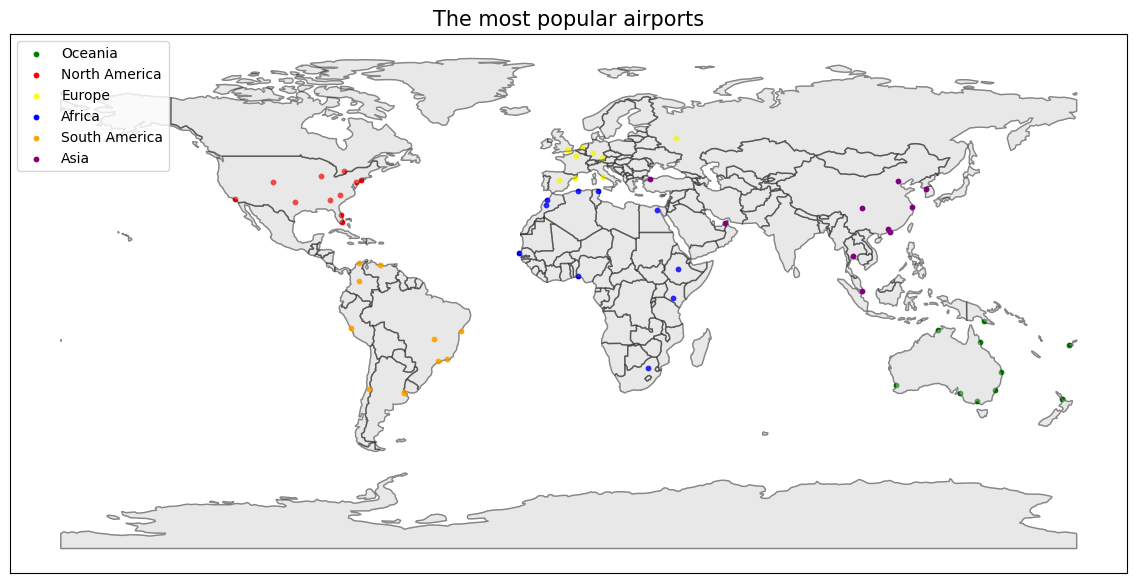

In [10]:
source_table = iata_arports.merge(routes_source_sorted,how='inner',left_on = "Airport ID",right_on = "Source airport ID")
source_table_3 = source_table.groupby(["Continents","Name of airport"])["Source airport ID"].count()
source_table_4 = pd.DataFrame(source_table_3)
destination_table = iata_arports.merge(routes_destination_sorted,how='inner',left_on = "Airport ID",right_on = "Destination airport ID")
destination_table_3 = destination_table.groupby(["Continents","Name of airport"])["Destination airport ID"].count()
destination_table_4 = pd.DataFrame(destination_table_3)
common_table_2 = source_table_4.merge(destination_table_4, on = ["Continents","Name of airport"])
common_table_2 = common_table_2.rename(columns = {"Source airport ID": "Takeoffs", "Destination airport ID" : "Landings"})
common_table_2["Takeoffs/Landings"] = common_table_2["Takeoffs"] + common_table_2["Landings"]
common_table_2 = common_table_2.groupby("Continents").apply(lambda x: x.sort_values("Takeoffs/Landings",ascending = False))
top_10 = common_table_2.groupby("Continents").head(10)
top_10.index = top_10.index.droplevel(1)
iata_arports_for_merge = iata_arports[["Continents","Name of airport","Country","City","IATA"]]
result_table = top_10.merge(iata_arports_for_merge,on = "Name of airport",how = "left")
result_table = result_table.set_index(["Continents","Name of airport"])
result_table["Takeoffs_2"] = result_table["Takeoffs"]
result_table["Landings_2"] = result_table["Landings"]
result_table["Takeoffs/Landings_2"] = result_table["Takeoffs/Landings"]
result_table = result_table.drop(["Takeoffs","Landings","Takeoffs/Landings"],axis=1)
result_table = result_table.rename(columns = {"Takeoffs_2":"Takeoffs","Landings_2":"Landings","Takeoffs/Landings_2":"Takeoffs/Landings"})
display(result_table)
iata_arports_for_merge2 = iata_arports[["Continents","Name of airport","Country","City","IATA","Latitude","Longitude"]]
result_table2 = top_10.merge(iata_arports_for_merge2,on = "Name of airport",how = "left")
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
for i, continent in enumerate(all_continents[1:7]):
    airport_coordinates_df = result_table2[result_table2["Continents"]==continent][["Latitude", "Longitude"]]
    airport_coordinates_gdf = gpd.GeoDataFrame(airport_coordinates_df, geometry=gpd.points_from_xy(airport_coordinates_df['Longitude'], airport_coordinates_df['Latitude']))
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.1)
    color_airports = ["green", "red", "yellow", "blue", "orange", "purple"] 
    airport_coordinates_gdf.plot(ax=ax,color=color_airports[i], markersize=10, marker='o', label=f"{continent}",alpha=1)
    ax.set_xticks([])
    ax.set_yticks([])
ax.set_title("The most popular airports",size=15)
ax.legend(loc='upper left',fontsize=10)
plt.show()

## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 

In [834]:
popular_planes= routes.groupby("Equipment")["Destination airport ID"].count()
popular_planes_df = pd.DataFrame(popular_planes).reset_index(drop=False)
popular_planes_df = popular_planes_df.rename(columns = {"Equipment": "IATA", "Destination airport ID" : "Number of Flights"})
iata_transcript = pd.read_csv("List_of_aircraft_type_designators_1.csv")
iata_transcript = iata_transcript.drop("ICAO\ncode",axis=1)
iata_transcript = iata_transcript.rename(columns = {"IATA\ntype code": "IATA"})
popular_planes_df['First_Value'] = popular_planes_df['IATA'].str.split().str[0]
popular_planes_df = popular_planes_df.drop("IATA",axis=1)
popular_planes_df = popular_planes_df.rename(columns = {"First_Value":"IATA"})
df_popular_planes = pd.DataFrame(popular_planes_df.groupby("IATA")["Number of Flights"].sum())
df_popular_planes = df_popular_planes.reset_index(drop=False)
table_for_planes = df_popular_planes.merge(iata_transcript,how ="left", on = "IATA")
table_for_planes = table_for_planes.sort_values("Number of Flights",ascending = False)[:10].reset_index(drop=True)
table_for_planes["Number of Flights_2"] = table_for_planes["Number of Flights"]
table_for_planes = table_for_planes.drop(["IATA","Number of Flights"],axis=1)
table_for_planes = table_for_planes.rename(columns = {"Number of Flights_2":"Number of Flights"})
display(table_for_planes)

,Model,Number of Flights
0,Airbus A320,11865
1,Boeing 737-800,8520
2,Airbus A319,5205
3,Boeing 737-800 Winglets,2566
4,NaN,2453
5,Airbus A321,2145
6,Boeing 737-700 Winglets,1812
7,NaN,1599
8,Embraer 190 / Lineage 1000,1391
9,Aerospatiale/Alenia ATR 72-201/-202,1387
